# Part 1

In [ ]:
import pandas as pd
from CHAID import Tree

"""
Description
------------------------------
Cross-section data about resume, call-back and employer information for 4,870 fictitious resumes sent in response to employment advertisements in Chicago and Boston in
2001, in a randomized controlled experiment conducted by Bertrand and Mullainathan (2004). The resumes contained information concerning the ethnicity of the applicant.
Because ethnicity is not typically included on a resume, resumes were differentiated on the basis of so-called “Caucasian sounding names” (such as Emily Walsh or Gregory
Baker) and “African American sounding names” (such as Lakisha Washington or Jamal Jones). A large collection of fictitious resumes were created and the pre-supposed
ethnicity (based on the sound of the name) was randomly assigned to each resume. These resumes were sent to prospective employers to see which resumes generated a
phone call from the prospective employer.


Format
------------------------------
A data frame containing 4,870 observations on 27 variables.
name: indicating applicant's first name.
gender: indicating gender.
ethnicity: indicating ethnicity (i.e., Caucasian-sounding vs. African-American sounding first name).
quality: indicating quality of resume.
call: Was the applicant called back?
city: indicating city: Boston or Chicago.
jobs: number of jobs listed on resume.
experience: number of years of work experience on the resume.
honors: Did the resume mention some honors?
volunteer: Did the resume mention some volunteering experience?
military: Does the applicant have military experience?
holes: Does the resume have some employment holes?
school: Does the resume mention some work experience while at school?
email: Was the e-mail address on the applicant's resume?
computer: Does the resume mention some computer skills?
special: Does the resume mention some special skills?
college: Does the applicant have a college degree or more?
minimum: indicating minimum experience requirement of the employer.
equal: Is the employer EOE (equal opportunity employment)?
wanted: indicating type of position wanted by employer.
requirements: Does the ad mention some requirement for the job?
reqexp: Does the ad mention some experience requirement?
reqcomm: Does the ad mention some communication skills requirement?
reqeduc: Does the ad mention some educational requirement?
reqcomp: Does the ad mention some computer skills requirement?
reqorg: Does the ad mention some organizational skills requirement?
industry: indicating type of employer industry.
"""

dataset = pd.read_csv("resumenames.csv")

dataset.tail()

C:\Users\user1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\CHAID\graph.py:13: UserWarning: Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.
  warnings.warn(UserWarning('Imports of optional packages needed to generate graphs failed. Please install with the "graph" option.'))


,Unnamed: 0,name,gender,ethnicity,quality,call,city,jobs,experience,honors,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
4865,4866,Tamika,female,afam,low,no,boston,2,1,no,...,none,no,secretary,yes,no,no,no,yes,no,finance/insurance/real estate
4866,4867,Ebony,female,afam,low,no,boston,4,6,no,...,none,no,manager,no,no,no,no,no,no,unknown
4867,4868,Jay,male,cauc,high,no,boston,6,8,no,...,none,no,manager,no,no,no,no,no,no,unknown
4868,4869,Latonya,female,afam,high,no,boston,4,2,no,...,none,no,manager,no,no,no,no,no,no,unknown
4869,4870,Laurie,female,cauc,low,no,boston,3,7,no,...,none,no,manager,no,no,no,no,no,no,unknown


In [3]:
dataset = dataset.drop(columns=["Unnamed: 0", "name"])

dataset.head()

,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,female,cauc,low,no,chicago,2,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,female,cauc,high,no,chicago,3,6,no,yes,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,female,afam,low,no,chicago,1,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,female,afam,high,no,chicago,4,6,no,yes,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,female,cauc,high,no,chicago,3,22,no,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


In [4]:
dataset.apply(pd.Series.nunique)

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

In [5]:
dataset.dtypes

gender          object
ethnicity       object
quality         object
call            object
city            object
jobs             int64
experience       int64
honors          object
volunteer       object
military        object
holes           object
school          object
email           object
computer        object
special         object
college         object
minimum         object
equal           object
wanted          object
requirements    object
reqexp          object
reqcomm         object
reqeduc         object
reqcomp         object
reqorg          object
industry        object
dtype: object

## Transformin numeric variables

### jobs variable

<Axes: xlabel='jobs', ylabel='Density'>

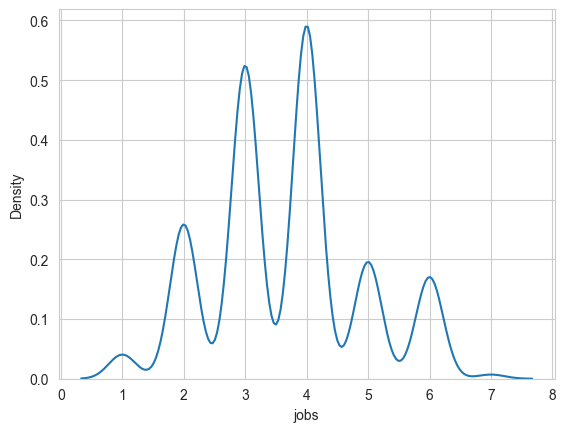

In [6]:
#visualize jobs variable
import seaborn as sns

sns.set_style(style="whitegrid")
sns.kdeplot(dataset["jobs"])

In [7]:
#transform experience variable
dataset["jobs"] = pd.cut(x=dataset["jobs"],
           bins=[-1,2.9,4.9,9],
           labels=[0,1,2])

dataset["jobs"]

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [8]:
#change categories to numbers
dataset["jobs"] = pd.factorize(dataset["jobs"])[0]

dataset["jobs"]

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: int64

### experience variable

<Axes: xlabel='experience', ylabel='Density'>

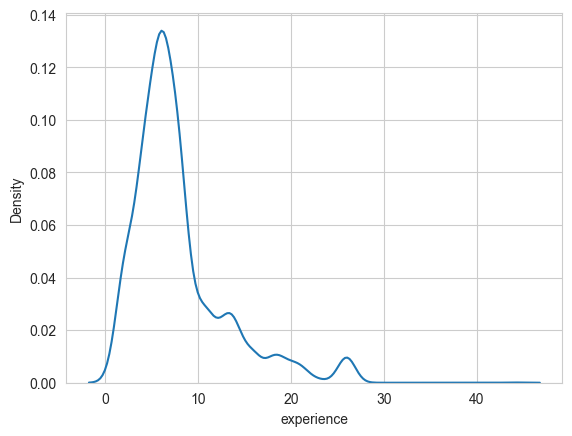

In [9]:
#visualize experience variable
sns.set_style(style="whitegrid")
sns.kdeplot(dataset["experience"])

In [10]:
#transform experience variable
dataset["experience"] = pd.qcut(dataset["experience"],
                               q=3,
                               labels=[0, 1, 2])

dataset["experience"] = pd.factorize(dataset["experience"])[0]

dataset["experience"]

0       0
1       0
2       0
3       0
4       1
       ..
4865    2
4866    0
4867    0
4868    2
4869    0
Name: experience, Length: 4870, dtype: int64

### Transform minimum and remaining variables

In [11]:
# minimum variable (indicating minimum experience requirement of the employer)
dataset["minimum"].value_counts()

minimum
none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: count, dtype: int64

In [12]:
# Transform minimum variable
replacement_dictionary = {
    "none": 0,          
    "0": 0,        
    "0.5": 0,      
    "1": 1,      
    "2": 1, 
    "some": 2,        
    "3": 2,         
    "4": 2,       
    "5": 3,           
    "6": 3,        
    "7": 3,       
    "8": 3,      
    "10": 3     
}

dataset["minimum"] = dataset["minimum"].replace(replacement_dictionary)

dataset["minimum"]

C:\Users\user1\AppData\Local\Temp\ipykernel_15780\1408047534.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["minimum"] = dataset["minimum"].replace(replacement_dictionary)


0       3
1       3
2       3
3       3
4       2
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: minimum, Length: 4870, dtype: int64

In [13]:
# transforming remaining variables
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,1,0,3,False,True,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
2,0,0,3,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1,0,3,False,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
4,1,1,2,False,True,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False


## CHAID

In [14]:
# get y name
y_name = dataset["call_yes"].name
y_name

'call_yes'

In [15]:
# get IV names (independent variables)
X_names = dataset.drop(columns="call_yes").columns
X_names, len(X_names)

(Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
        'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
        'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
        'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
        'wanted_other', 'wanted_retail sales', 'wanted_secretary',
        'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
        'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
        'industry_finance/insurance/real estate',
        'industry_health/education/social services', 'industry_manufacturing',
        'industry_trade', 'industry_transport/communication',
        'industry_unknown'],
       dtype='object'),
 34)

In [16]:
"""
'jobs', 'experience', 'minimum' are ordinal variables and the others are nominal variables!
"""
dict(zip(X_names, ['ordinal']*3 + ['nominal']*31))

{'jobs': 'ordinal',
 'experience': 'ordinal',
 'minimum': 'ordinal',
 'gender_male': 'nominal',
 'ethnicity_cauc': 'nominal',
 'quality_low': 'nominal',
 'city_chicago': 'nominal',
 'honors_yes': 'nominal',
 'volunteer_yes': 'nominal',
 'military_yes': 'nominal',
 'holes_yes': 'nominal',
 'school_yes': 'nominal',
 'email_yes': 'nominal',
 'computer_yes': 'nominal',
 'special_yes': 'nominal',
 'college_yes': 'nominal',
 'equal_yes': 'nominal',
 'wanted_office support': 'nominal',
 'wanted_other': 'nominal',
 'wanted_retail sales': 'nominal',
 'wanted_secretary': 'nominal',
 'wanted_supervisor': 'nominal',
 'requirements_yes': 'nominal',
 'reqexp_yes': 'nominal',
 'reqcomm_yes': 'nominal',
 'reqeduc_yes': 'nominal',
 'reqcomp_yes': 'nominal',
 'reqorg_yes': 'nominal',
 'industry_finance/insurance/real estate': 'nominal',
 'industry_health/education/social services': 'nominal',
 'industry_manufacturing': 'nominal',
 'industry_trade': 'nominal',
 'industry_transport/communication': 'nomina

In [17]:
# CHAID tree
model = Tree.from_pandas_df(dataset,
                            dict(zip(X_names, ['ordinal']*3 + ['nominal']*31)),
                            y_name,
                            max_depth=3,
                            min_child_node_size=250)

## Visualization

In [18]:
model.print_tree()

([], {np.False_: np.float64(4478.0), np.True_: np.float64(392.0)}, (special_yes, p=9.091088602618782e-15, score=60.08363933760746, groups=[[False], [True]]), dof=1))
|-- ([False], {np.False_: np.float64(3075.0), np.True_: np.float64(194.0)}, (requirements_yes, p=0.0002718068476768014, score=13.25532368278205, groups=[[False], [True]]), dof=1))
|   |-- ([False], {np.False_: np.float64(576.0), np.True_: np.float64(57.0)}, (experience, p=0.003975225728095155, score=8.295096983690131, groups=[[0], [1, 2]]), dof=1))
|   |   |-- ([0], {np.False_: np.float64(346.0), np.True_: np.float64(23.0)}, <Invalid Chaid Split> - the max depth has been reached)
|   |   +-- ([1, 2], {np.False_: np.float64(230.0), np.True_: np.float64(34.0)}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([True], {np.False_: np.float64(2499.0), np.True_: np.float64(137.0)}, (ethnicity_cauc, p=0.03903799830275105, score=4.2592132081738185, groups=[[False], [True]]), dof=1))
|       |-- ([False], {np.False_

# Part 2

In [19]:
# import libraries
import pandas as pd
import statsmodels.api as sm
from CHAID import Tree

In [ ]:
# get data
"""
Description
-----------------------------------
A few stops have been deleted, either because thesu location data was missing, or a few very rare categories were also
removed. The data frame MplsDemo contains 2015 demongraphic data on Minneapolis neighborhoods, using the same
neighborhood names as this data file. Demographics are available for 84 of Minneaolis' 87 neighborhoods. The
remaining 3 presumably have no housing.

Format
-----------------------------------
A data frame with 51857 observations on the following 14 variables.
idNum: character vector of incident identifiers
date: a POSIXlt date variable giving the date and time of the stop
problem: a factor with levels suspicious for suspicious vehicle or person stops and traffic for traffic stops
citationIssued: a factor with levels no yes indicating if a citation was issued
personSearch: a factor with levels no yes indicating if the stopped person was searched
vehicleSearch: a factor with levels no or yes indicating if a vehicle was searched
preRace: a factor with levels white, black, east african, latino, native american, asian, other, unknown for the officer's
         assessment of race of the person stopped before speaking with the person stopped
race: a factor with levels white, black, east african, latino, native american, asian, other, unknown, officer's
      determination of race after the incident
gender: a factor with levels female, male, unknown, gender of person stopped
lat: latitude of the location of the incident, somewhat rounded
long: latitude of the location of the incident, somewhat rounded
policePrecinct: Minneapolis Police Precinct number
neighborhood: a factor with 84 levels giving the name of the Minneapolis neighborhood of the incident
MDC: a factor with levels mdc for data collected via in-vehicle computer, and other for data submitted by officers not in a
     vehicle, either on foot, bicycle or horseback. Several of the variables above were recorded only in-vehicle
"""

data = sm.datasets.get_rdataset("MplsStops",
                                package="carData").data

data.head()

,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
rownames,,,,,,,,,,,,,,
6823,17-000003,2017-01-01T06:00:42Z,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Unknown,44.966617,-93.246458,1,Cedar Riverside
6824,17-000007,2017-01-01T06:03:07Z,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Male,44.980450,-93.271340,1,Downtown West
6825,17-000073,2017-01-01T06:23:15Z,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.948350,-93.275380,5,Whittier
6826,17-000092,2017-01-01T06:33:48Z,suspicious,MDC,NaN,NO,NO,Unknown,East African,Male,44.948360,-93.281350,5,Whittier
6827,17-000098,2017-01-01T06:37:58Z,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.979078,-93.262076,1,Downtown West


## Data Prep

In [21]:
columns = ["problem", "vehicleSearch", "race", "gender", "policePrecinct"]
max_depth = 2

dataset = data.loc[:, columns]
dataset.head()

,problem,vehicleSearch,race,gender,policePrecinct
rownames,,,,,
6823,suspicious,NO,Unknown,Unknown,1
6824,suspicious,NO,Unknown,Male,1
6825,traffic,NO,White,Female,5
6826,suspicious,NO,East African,Male,5
6827,traffic,NO,White,Female,1


In [22]:
# transform into dummies
dataset = pd.get_dummies(dataset, drop_first=True)

dataset.head()

,policePrecinct,problem_traffic,vehicleSearch_YES,race_Black,race_East African,race_Latino,race_Native American,race_Other,race_Unknown,race_White,gender_Male,gender_Unknown
rownames,,,,,,,,,,,,
6823,1,False,False,False,False,False,False,False,True,False,False,True
6824,1,False,False,False,False,False,False,False,True,False,True,False
6825,5,True,False,False,False,False,False,False,False,True,False,False
6826,5,False,False,False,True,False,False,False,False,False,True,False
6827,1,True,False,False,False,False,False,False,False,True,False,False


## CHAID

In [23]:
# get name of dependent variables
y_name = dataset.loc[:, "vehicleSearch_YES"].name
y_name

'vehicleSearch_YES'

In [26]:
# IV names
X_names = dataset.drop(columns="vehicleSearch_YES").columns
print(X_names)
print(len(X_names))
print(dataset.shape)

Index(['policePrecinct', 'problem_traffic', 'race_Black', 'race_East African',
       'race_Latino', 'race_Native American', 'race_Other', 'race_Unknown',
       'race_White', 'gender_Male', 'gender_Unknown'],
      dtype='object')
11
(51920, 12)


In [32]:
# CHAID model
model = Tree.from_pandas_df(dataset,
                            i_variables=dict(zip(X_names, ["nominal"]*11)),
                            d_variable=y_name,
                            max_depth=max_depth)

In [38]:
model.print_tree()

([], {np.False_: np.float64(48800.0), np.True_: np.float64(3120.0)}, (race_Black, p=0.0, score=1578.566318442215, groups=[[False], [True]]), dof=1))
|-- ([False], {np.False_: np.float64(35474.0), np.True_: np.float64(1226.0)}, (gender_Male, p=9.77440228890622e-66, score=293.2423531381179, groups=[[False], [True]]), dof=1))
|   |-- ([False], {np.False_: np.float64(20782.0), np.True_: np.float64(417.0)}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([True], {np.False_: np.float64(14692.0), np.True_: np.float64(809.0)}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([True], {np.False_: np.float64(13326.0), np.True_: np.float64(1894.0)}, (policePrecinct, p=1.979001307662558e-60, score=274.94502650450636, groups=[[1], [2, 5, 3], [4]]), dof=2))
    |-- ([1], {np.False_: np.float64(2029.0), np.True_: np.float64(147.0)}, <Invalid Chaid Split> - the max depth has been reached)
    |-- ([2, 5, 3], {np.False_: np.float64(6208.0), np.True_: np.float64(653.0)}, <Inv